In [ ]:
# source for wheather-data: https://open-meteo.com/en/docs/historical-weather-api?latitude=40.73061&longitude=-73.935242&start_date=2023-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,cloud_cover,wind_speed_10m,is_day,sunshine_duration&daily=temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,weather_code,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours#location_and_time

# removed header from csv
# latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation
# 40.738136,-73.91489,14.0,0,GMT,GMT

In [ ]:
import sys
from pathlib import Path

ROOT = Path.cwd().parent          # eine Ebene über notebooks/
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

import pandas as pd
import seaborn as sns
from scipy.stats import median_abs_deviation
from src.utils_stats import create_na_table, create_outlier_table, trimmed_mean

df = pd.read_csv("../data/wheather_hourly.csv")

Projekt-Root hinzugefügt: /Users/lukas/Library/CloudStorage/OneDrive-UniversitaetSt.Gallen/3. Semester/Statistics for Data Science/Statistic-Data-Sience-Project


# How does my dataset look like - show me some stuff?!

In [3]:
print(200*"=")
print(f"Datensatz geladen: {df.shape[0]:,} Zeilen, {df.shape[1]} Spalten")
print(200*"-")
print("Erste Zeilen:")
display(df.head(5))
print(200*"-")
print("Describe:")
display(df.describe())
print(200*"-")
print("Info:")
display(df.info())
print(200*"=")

Datensatz geladen: 8,760 Zeilen, 14 Spalten
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Erste Zeilen:


,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),cloud_cover (%),wind_speed_10m (km/h),is_day (),sunshine_duration (s)
0,2023-01-01T00:00,9.9,100,9.9,8.7,0.4,0.4,0.0,0.0,51,100,7.9,0,0.0
1,2023-01-01T01:00,11.0,100,11.0,9.9,1.3,1.3,0.0,0.0,61,100,10.0,0,0.0
2,2023-01-01T02:00,11.1,100,11.1,10.2,0.9,0.9,0.0,0.0,53,100,8.0,0,0.0
3,2023-01-01T03:00,11.1,100,11.1,9.8,2.0,2.0,0.0,0.0,61,100,11.2,0,0.0
4,2023-01-01T04:00,10.9,99,10.8,9.8,1.2,1.2,0.0,0.0,55,100,9.7,0,0.0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Describe:


,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),cloud_cover (%),wind_speed_10m (km/h),is_day (),sunshine_duration (s)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.943699,72.798516,7.684692,11.113116,0.169441,0.165799,0.002557,0.000489,9.655936,56.810046,13.110811,0.507763,1261.110858
std,8.751998,17.702665,8.837931,11.103872,0.850847,0.847752,0.040557,0.004048,19.484471,43.241762,6.591836,0.499968,1668.012868
min,-16.800000,11.000000,-29.500000,-24.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.800000,60.000000,0.700000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,8.400000,0.000000,0.000000
50%,12.600000,75.000000,7.750000,10.300000,0.000000,0.000000,0.000000,0.000000,3.000000,71.000000,12.000000,1.000000,0.000000
75%,20.200000,87.000000,14.500000,20.300000,0.000000,0.000000,0.000000,0.000000,3.000000,100.000000,16.900000,1.000000,3600.000000
max,35.900000,100.000000,25.000000,38.900000,17.900000,17.900000,1.330000,0.060000,75.000000,100.000000,53.800000,1.000000,3600.000000


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       8760 non-null   object 
 1   temperature_2m (°C)        8760 non-null   float64
 2   relative_humidity_2m (%)   8760 non-null   int64  
 3   dew_point_2m (°C)          8760 non-null   float64
 4   apparent_temperature (°C)  8760 non-null   float64
 5   precipitation (mm)         8760 non-null   float64
 6   rain (mm)                  8760 non-null   float64
 7   snowfall (cm)              8760 non-null   float64
 8   snow_depth (m)             8760 non-null   float64
 9   weather_code (wmo code)    8760 non-null   int64  
 10  cloud_cov

None

# Convert Datatypes

In [4]:
df["time"] = pd.to_datetime(df["time"], utc=True)
df["relative_humidity_2m (%)"] = df["relative_humidity_2m (%)"].astype(float)
df["cloud_cover (%)"] = df["cloud_cover (%)"].astype(float)

print(70*"=")
print("Info:")
display(df.info())
print(70*"=")

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   time                       8760 non-null   datetime64[ns, UTC]
 1   temperature_2m (°C)        8760 non-null   float64            
 2   relative_humidity_2m (%)   8760 non-null   float64            
 3   dew_point_2m (°C)          8760 non-null   float64            
 4   apparent_temperature (°C)  8760 non-null   float64            
 5   precipitation (mm)         8760 non-null   float64            
 6   rain (mm)                  8760 non-null   float64            
 7   snowfall (cm)              8760 non-null   float64            
 8   snow_depth (m)             8760 non-null   float64            
 9   weather_code (wmo code)    8760 non-null   int64              
 10  cloud_cover (%)            8760 non-null   float64            
 11

None

# Any missing values?

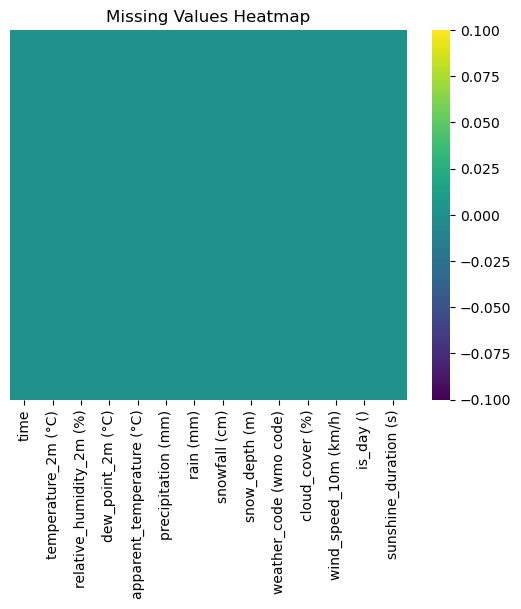

In [5]:
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
print(55*"=")
print("Überblick über fehlende Werte nach Spalte:")
display(create_na_table(df))
print(55*"=")

Überblick über fehlende Werte nach Spalte:


,column,n_missing,percent_missing
0,time,0,0.0
1,temperature_2m (°C),0,0.0
2,relative_humidity_2m (%),0,0.0
3,dew_point_2m (°C),0,0.0
4,apparent_temperature (°C),0,0.0
5,precipitation (mm),0,0.0
6,rain (mm),0,0.0
7,snowfall (cm),0,0.0
8,snow_depth (m),0,0.0
9,weather_code (wmo code),0,0.0


# Wie sind die Daten verteilt?

In [7]:
num_cols = df.select_dtypes(include="number")
lagekennzahlen_df = pd.DataFrame({
    "n": num_cols.count(),
    "Mean": num_cols.mean(),
    "Median": num_cols.median(),
    "Modus": num_cols.apply(lambda s: ", ".join(map(str, s.mode().tolist()))), # Wenn es mehrere Modi gibt diese als comma-separated Liste anzeigen
    "Trimmed Mean with 10%": num_cols.apply(lambda x: trimmed_mean(x)),
    "Min": num_cols.min(), 
    "Q1": num_cols.quantile(0.25),
    "Q3": num_cols.quantile(0.75),
    "Max": num_cols.max() 

})
format = {
    c: "{:.2f}"
    for c in lagekennzahlen_df.columns
    if pd.api.types.is_numeric_dtype(lagekennzahlen_df[c])
}

print(111*"=")
print("Überblick über Lagekennzahlen nach Spalte:")
display(lagekennzahlen_df.style.format(format))
print(111*"=")

Überblick über Lagekennzahlen nach Spalte:


,n,Mean,Median,Modus,Trimmed Mean with 10%,Min,Q1,Q3,Max
temperature_2m (°C),8760.00,12.94,12.60,6.2,12.89,-16.80,5.80,20.20,35.90
relative_humidity_2m (%),8760.00,72.80,75.00,94.0,73.97,11.00,60.00,87.00,100.00
dew_point_2m (°C),8760.00,7.68,7.75,20.9,7.79,-29.50,0.70,14.50,25.00
apparent_temperature (°C),8760.00,11.11,10.30,0.1,10.91,-24.30,1.80,20.30,38.90
precipitation (mm),8760.00,0.17,0.00,0.0,0.01,0.00,0.00,0.00,17.90
rain (mm),8760.00,0.17,0.00,0.0,0.01,0.00,0.00,0.00,17.90
snowfall (cm),8760.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.33
snow_depth (m),8760.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.06
weather_code (wmo code),8760.00,9.66,3.00,3,4.87,0.00,0.00,3.00,75.00
cloud_cover (%),8760.00,56.81,71.00,100.0,58.51,0.00,6.00,100.00,100.00


# Wie sind die Daten gestreut?

In [8]:
# Klassische & robuste Streuungskennzahlen
streuungskennzahlen_df = pd.DataFrame({
    "SD": num_cols.std(),
    "Var": num_cols.var(),
    "IQR": num_cols.quantile(0.75) - num_cols.quantile(0.25),
    "MAD": num_cols.apply(lambda x: median_abs_deviation(x)),
    "Range": num_cols.max() - num_cols.min()
})
print(70*"=")
display(streuungskennzahlen_df.style.format("{:,.2f}"))
print(70*"=")

,SD,Var,IQR,MAD,Range
temperature_2m (°C),8.75,76.60,14.40,7.20,52.70
relative_humidity_2m (%),17.70,313.38,27.00,13.00,89.00
dew_point_2m (°C),8.84,78.11,13.80,6.95,54.50
apparent_temperature (°C),11.10,123.30,18.50,9.10,63.20
precipitation (mm),0.85,0.72,0.00,0.00,17.90
rain (mm),0.85,0.72,0.00,0.00,17.90
snowfall (cm),0.04,0.00,0.00,0.00,1.33
snow_depth (m),0.00,0.00,0.00,0.00,0.06
weather_code (wmo code),19.48,379.64,3.00,2.00,75.00
cloud_cover (%),43.24,"1,869.85",94.00,29.00,100.00


# Haben wir Ausreißer in unseren Daten?

In [11]:
print(64*"=")
display(create_outlier_table(df))
print(64*"=")

,Spalte,Z-Score,Modified Z-Score,Tukey IQR
0,temperature_2m (°C),7,0,4
1,relative_humidity_2m (%),10,0,10
2,dew_point_2m (°C),27,3,23
3,apparent_temperature (°C),6,0,0
4,precipitation (mm),128,0,1324
5,rain (mm),128,0,1290
6,snowfall (cm),49,0,72
7,snow_depth (m),87,0,196
8,weather_code (wmo code),72,1325,1325
9,cloud_cover (%),0,0,0
